In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
train_df = pd.read_csv("X_train.csv")

In [4]:
train_df.head()

filghtId  airline  flight source_city departure_time stops arrival_time  \
0    252589  Vistara  UK-808   Bangalore  Early_Morning   one        Night   
1    223754  Vistara  UK-927       Delhi        Morning   one      Evening   
2    243398  Vistara  UK-988      Mumbai          Night   one      Morning   
3    208360  Vistara  UK-815       Delhi        Morning   one        Night   
4    247226  Vistara  UK-854   Bangalore        Evening   one      Morning   

  destination_city  duration  days_left  
0           Mumbai     13.25         46  
1          Chennai     10.42         31  
2          Chennai     13.00         28  
3           Mumbai     12.67         17  
4            Delhi     13.67         32

In [5]:
print("Train data dimensions: ", train_df.shape)

Train data dimensions:  (5698, 10)


In [6]:
print("Number of missing values",train_df.isnull().sum().sum())

Number of missing values 0


In [7]:
train_df.describe()

filghtId     duration    days_left
count    5698.000000  5698.000000  5698.000000
mean   252173.147771    13.643054    25.750439
std     29757.539642     6.830058    13.519183
min      8339.000000     1.250000     1.000000
25%    229691.250000     8.750000    14.000000
50%    252872.500000    13.000000    26.000000
75%    276143.250000    17.580000    37.000000
max    300152.000000    45.830000    49.000000

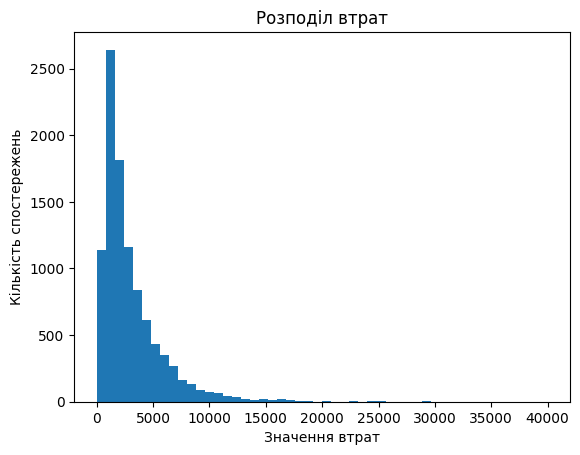

In [183]:
plt.hist(train_df['loss'], bins=50)
plt.title('Розподіл втрат')
plt.xlabel('Значення втрат')
plt.ylabel('Кількість спостережень')
plt.show()

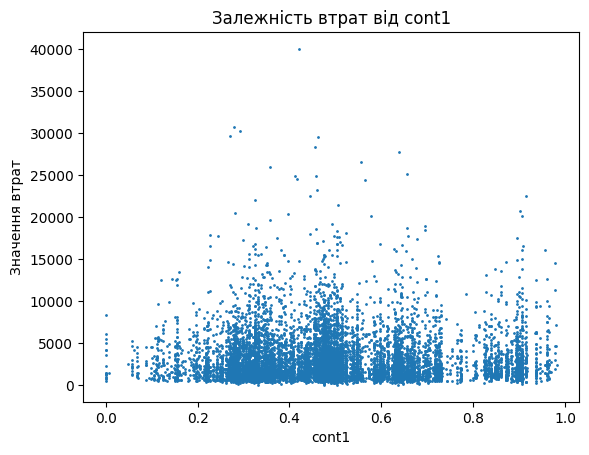

In [184]:
plt.scatter(train_df['cont1'], train_df['loss'], s=1)
plt.title('Залежність втрат від cont1')
plt.xlabel('cont1')
plt.ylabel('Значення втрат')
plt.show()

In [185]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 10.1+ MB


In [186]:
contFeatureslist = []
for colName,x in train_df.iloc[1,:].iteritems():
    if(not str(x).isalpha()):
        contFeatureslist.append(colName)

In [187]:
train_df[contFeatureslist].describe().T

count          mean          std        min          25%  \
id      10000.0  15923.211300  9150.900530   1.000000  7967.500000   
cont1   10000.0      0.491571     0.186783   0.000016     0.344779   
cont2   10000.0      0.505951     0.206791   0.003362     0.358319   
cont3   10000.0      0.500716     0.203082   0.002634     0.336963   
cont4   10000.0      0.489793     0.211089   0.176921     0.318422   
cont5   10000.0      0.482104     0.206246   0.281143     0.281143   
cont6   10000.0      0.490137     0.204170   0.012683     0.336105   
cont7   10000.0      0.485704     0.180543   0.069503     0.350175   
cont8   10000.0      0.486785     0.199980   0.236880     0.312800   
cont9   10000.0      0.483771     0.181433   0.000080     0.358970   
cont10  10000.0      0.495867     0.184756   0.000000     0.364580   
cont11  10000.0      0.497109     0.211057   0.035321     0.324486   
cont12  10000.0      0.496552     0.210484   0.036232     0.321570   
cont13  10000.0      0.492068     0.212446   0.000228     0.312885   
cont14  10000.0      0.497483     0.223026   0.181382     0.294588   
loss    10000.0   3051.673710  2870.291160  20.990000  1212.875000   

                 50%           75%           max  
id      15933.500000  23880.250000  31688.000000  
cont1       0.475784      0.612965      0.981552  
cont2       0.555782      0.681761      0.862654  
cont3       0.527991      0.634224      0.944251  
cont4       0.452887      0.652072      0.952482  
cont5       0.422268      0.627218      0.982520  
cont6       0.439786      0.648683      0.988960  
cont7       0.437192      0.591165      1.000000  
cont8       0.435180      0.617950      0.980200  
cont9       0.435240      0.556480      0.991690  
cont10      0.461190      0.614590      0.994980  
cont11      0.464956      0.682315      0.996799  
cont12      0.481306      0.682413      0.996219  
cont13      0.363547      0.689974      0.988494  
cont14      0.415362      0.724558      0.843911  
loss     2122.845000   3898.160000  40017.170000

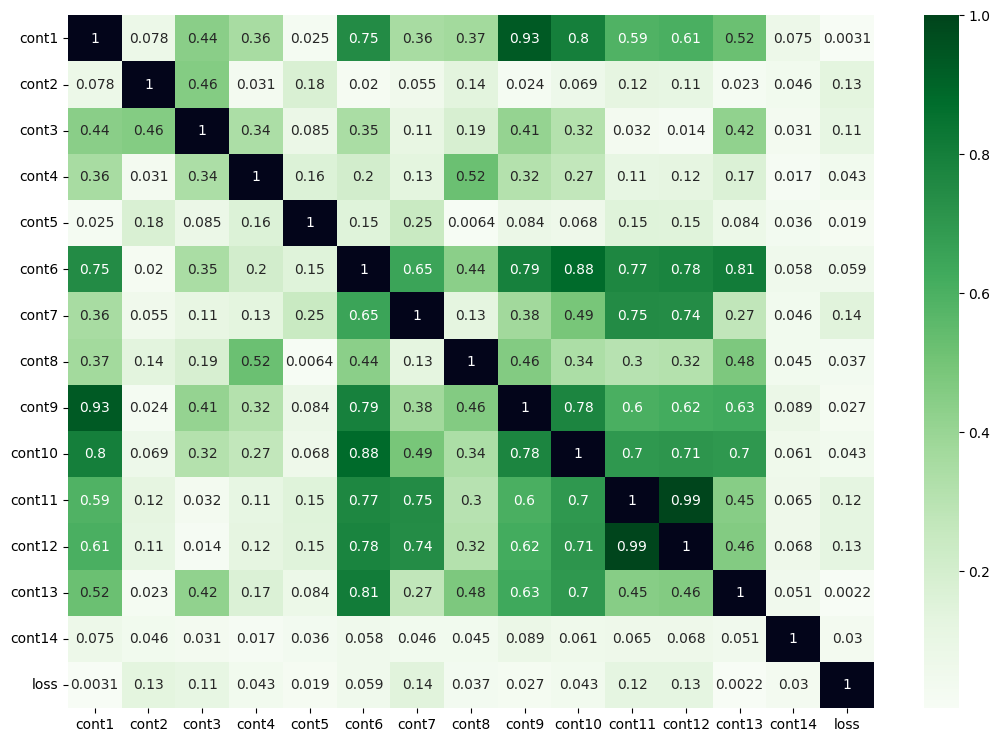

In [188]:
contFeatureslist.remove("id")
correlationMatrix = train_df[contFeatureslist].corr().abs()
plt.subplots(figsize=(13, 9))
sns.heatmap(correlationMatrix,annot=True,cmap='Greens')

sns.heatmap(correlationMatrix, mask=correlationMatrix < 1, cbar=False)
plt.show()

In [189]:
size = 15
data=train_df[contFeatureslist]
cols=data.columns 
data_corr = data.corr()
threshold = 0.5
corr_list = []

for i in range(0,size): 
    for j in range(i+1,size): 
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j])          
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

cont11 and cont12 = 0.99
cont1 and cont9 = 0.93
cont6 and cont10 = 0.88
cont6 and cont13 = 0.81
cont1 and cont10 = 0.80
cont6 and cont9 = 0.79
cont6 and cont12 = 0.78
cont9 and cont10 = 0.78
cont6 and cont11 = 0.77
cont1 and cont6 = 0.75
cont7 and cont11 = 0.75
cont7 and cont12 = 0.74
cont10 and cont12 = 0.71
cont10 and cont11 = 0.70
cont10 and cont13 = 0.70
cont6 and cont7 = 0.65
cont9 and cont13 = 0.63
cont9 and cont12 = 0.62
cont1 and cont12 = 0.61
cont9 and cont11 = 0.60
cont1 and cont11 = 0.59
cont4 and cont8 = 0.52
cont1 and cont13 = 0.52


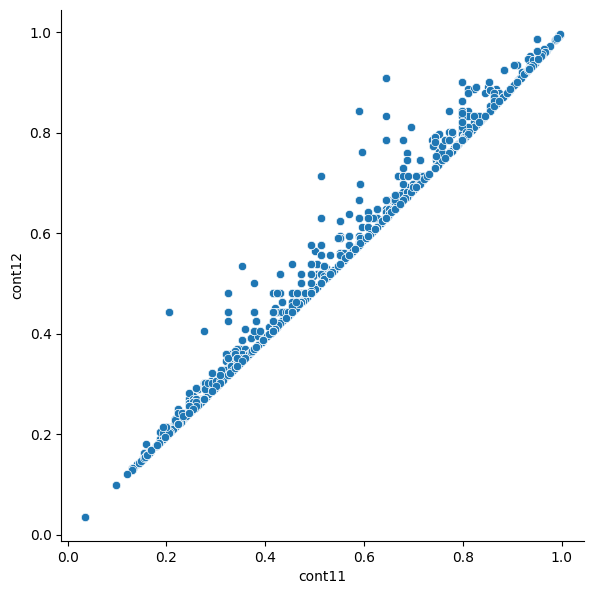

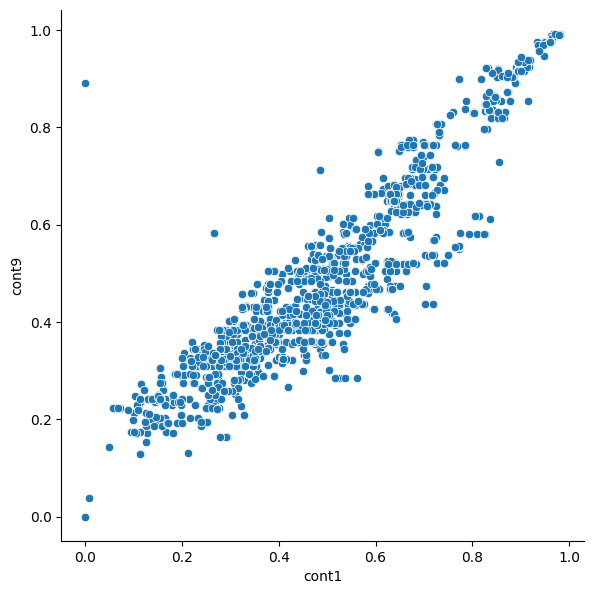

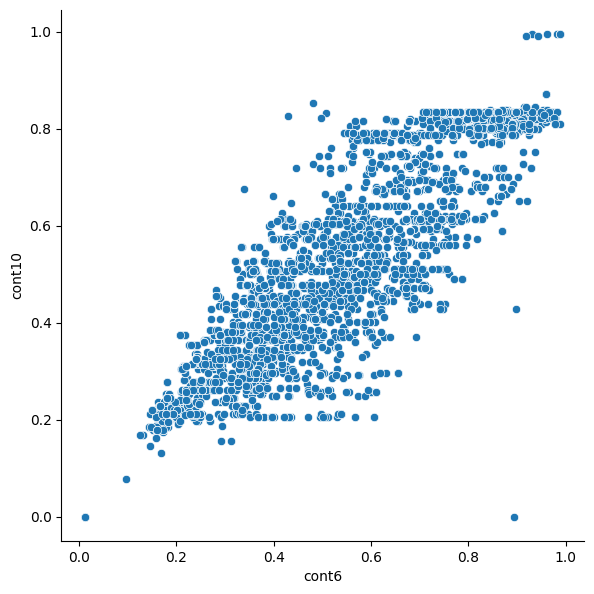

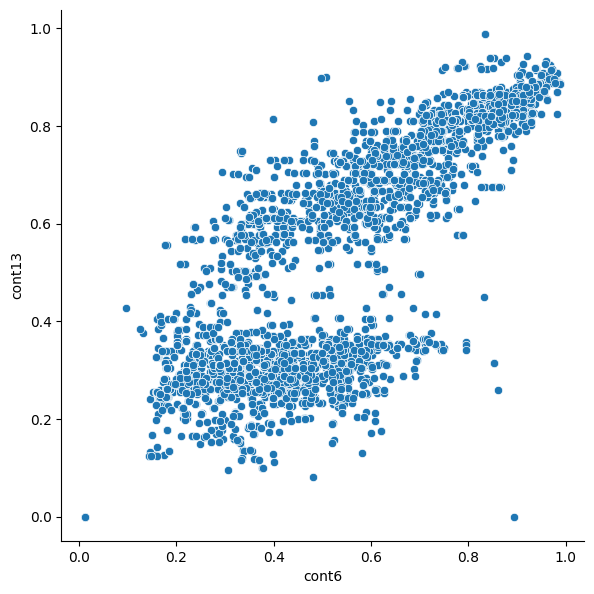

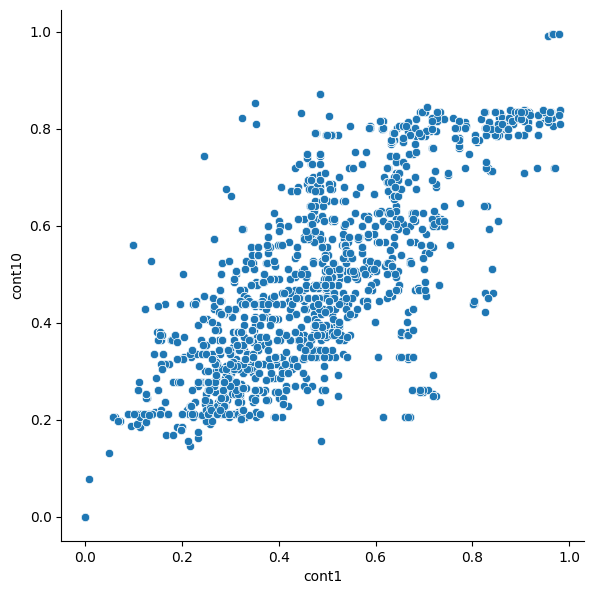

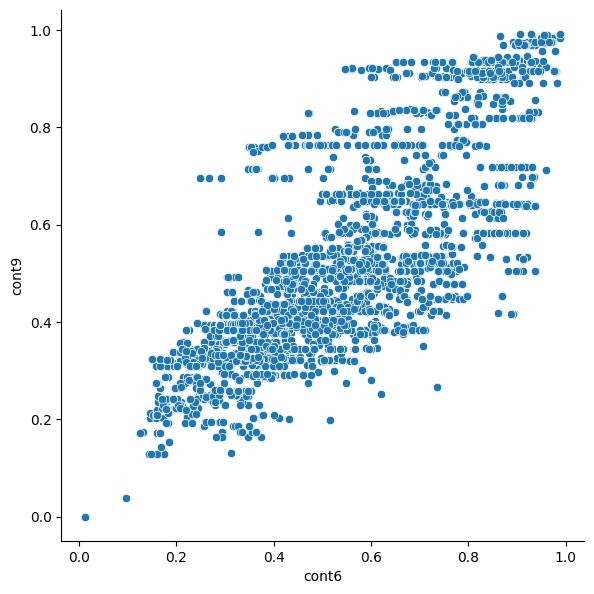

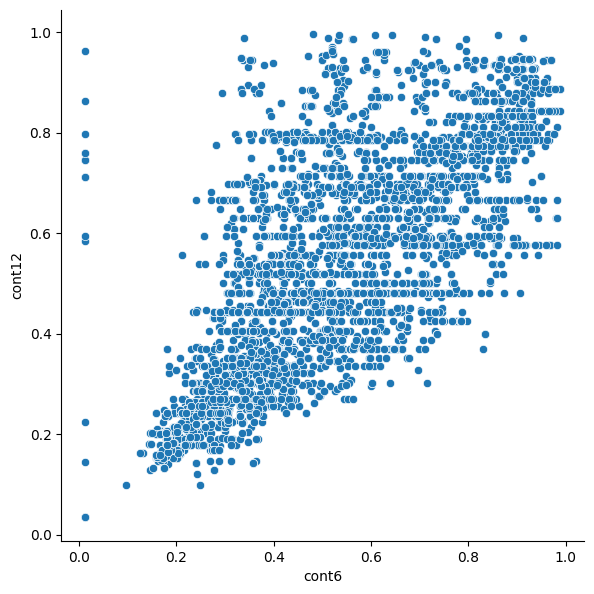

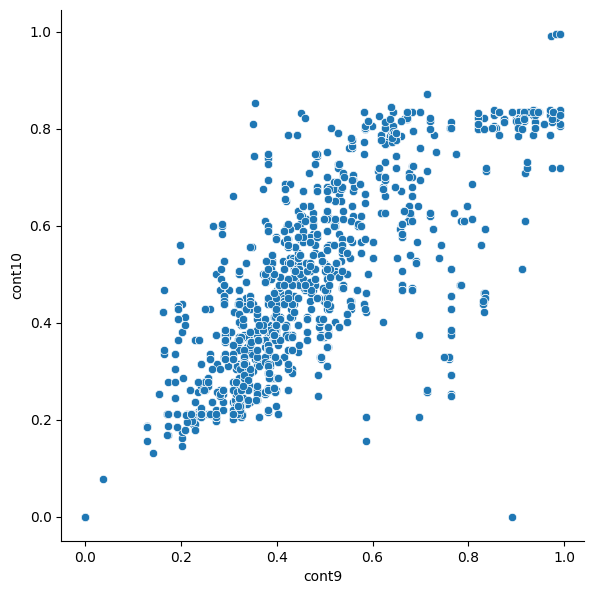

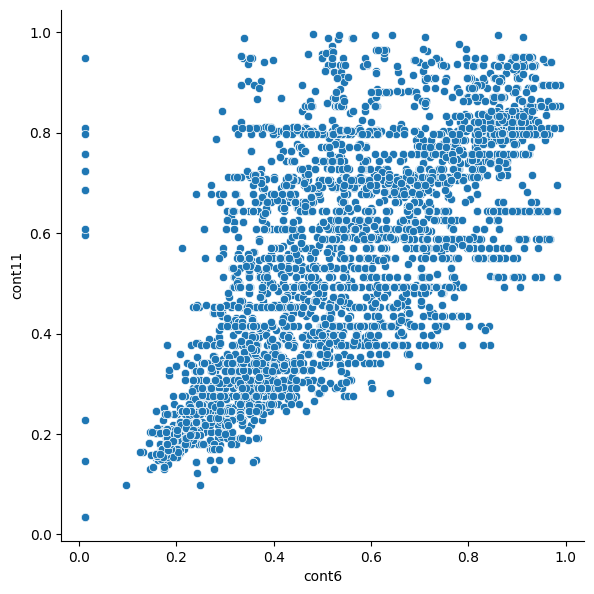

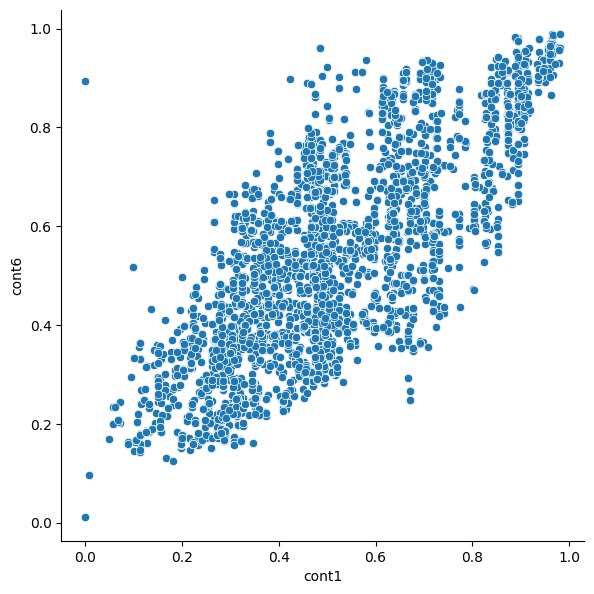

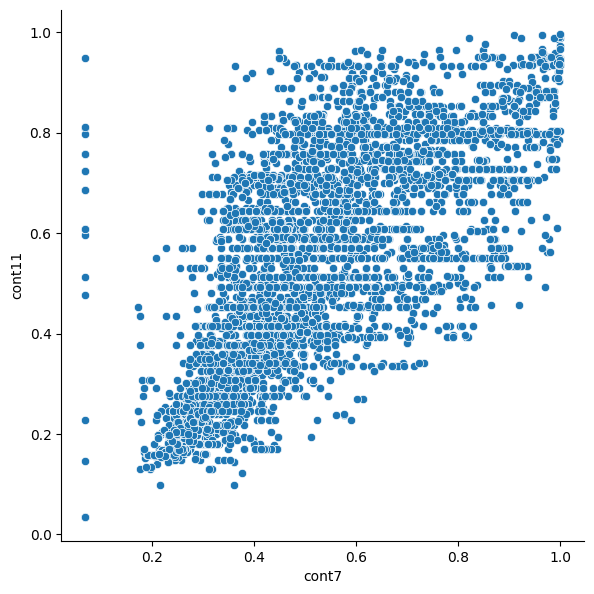

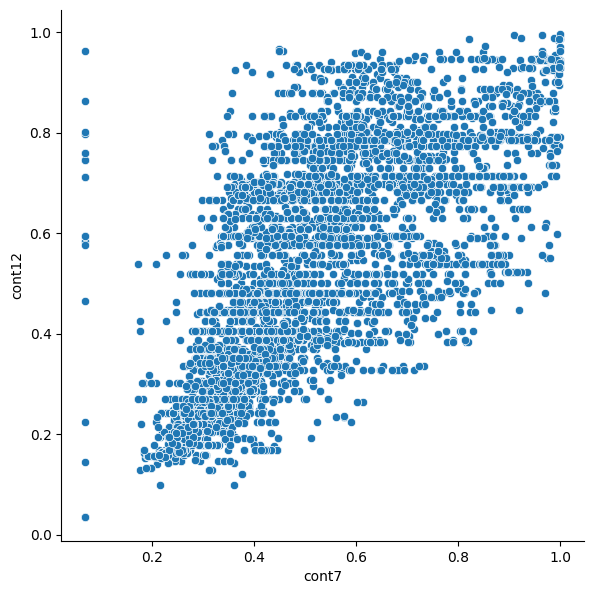

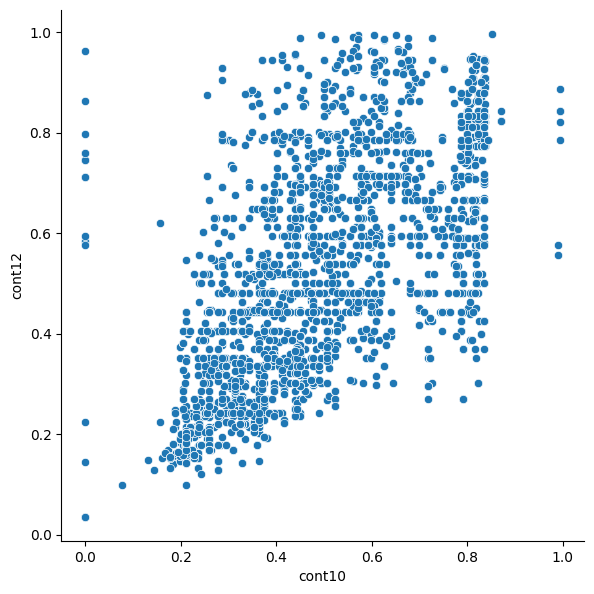

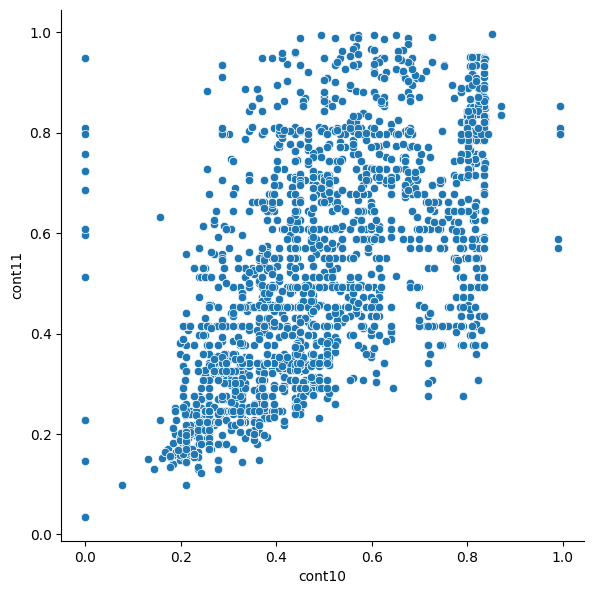

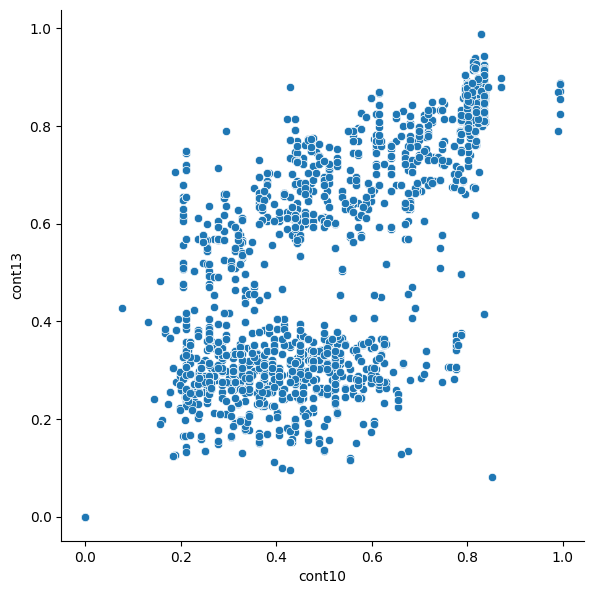

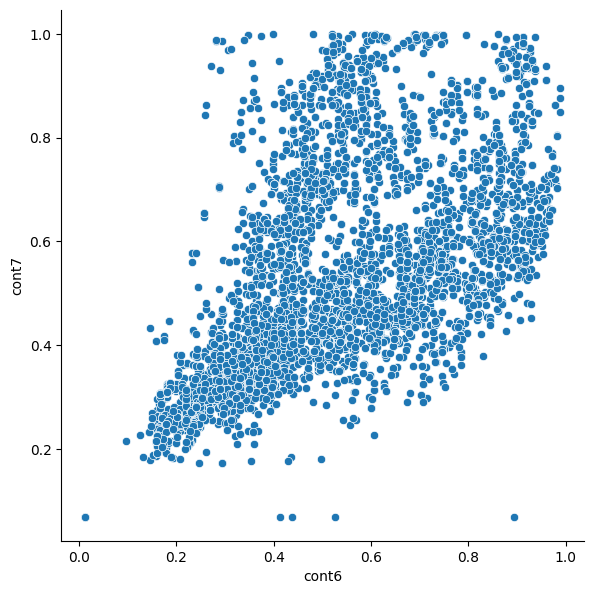

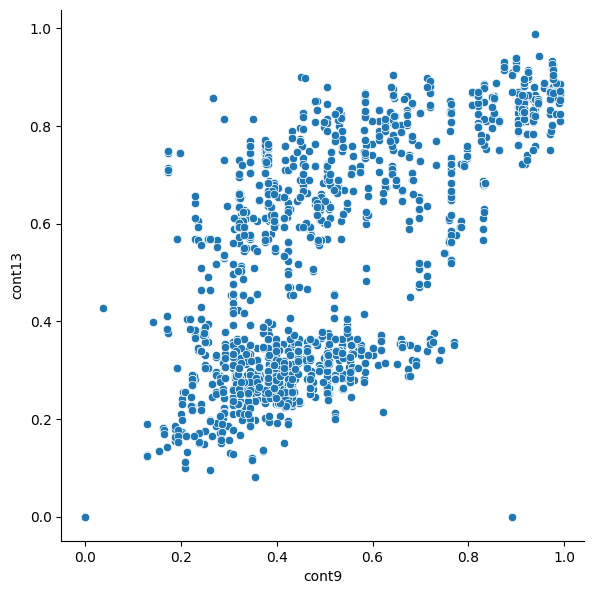

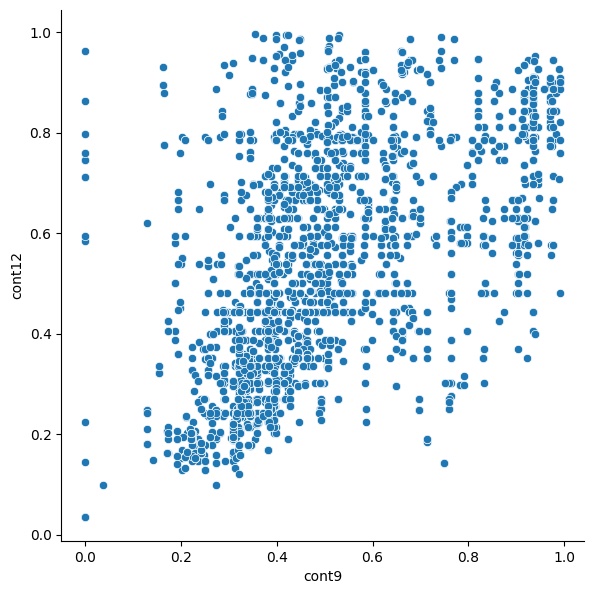

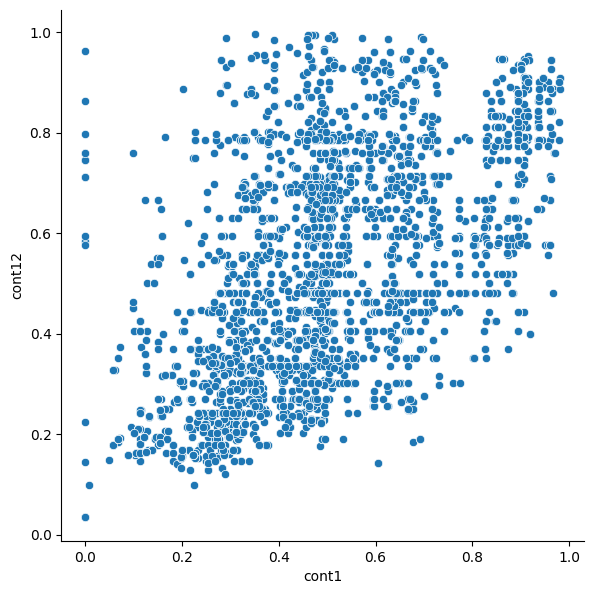

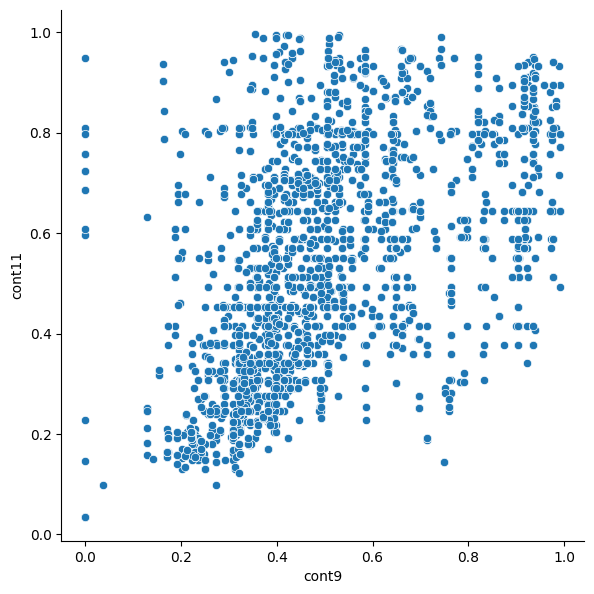

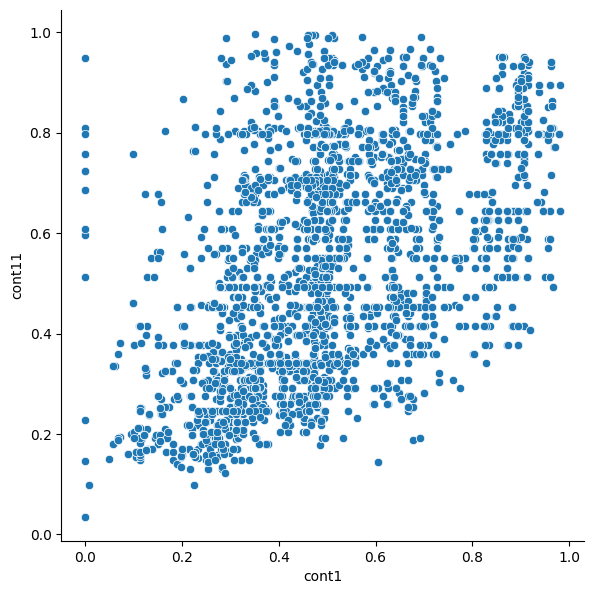

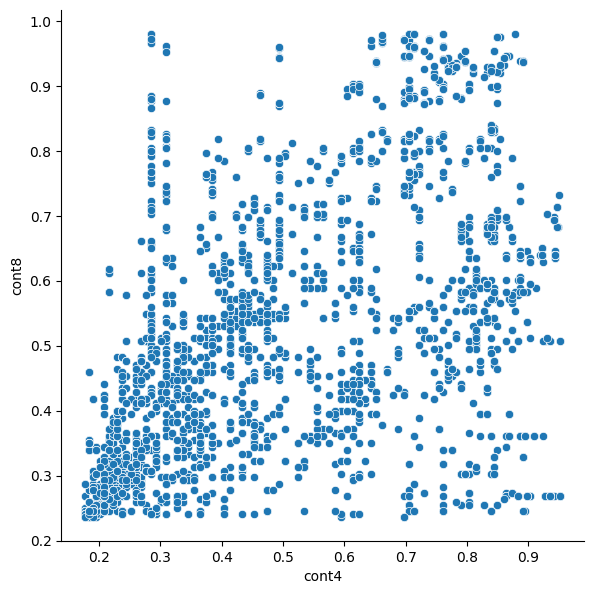

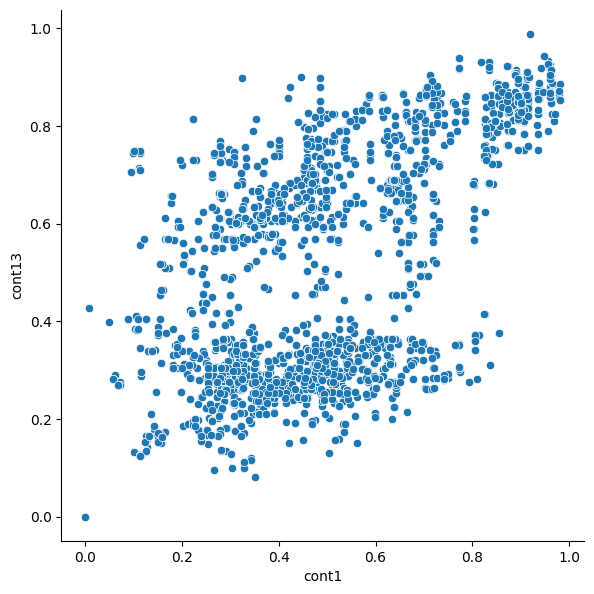

In [190]:
for v,i,j in s_corr_list:
    sns.pairplot(train_df, height=6, x_vars=cols[i],y_vars=cols[j] )
    plt.show()


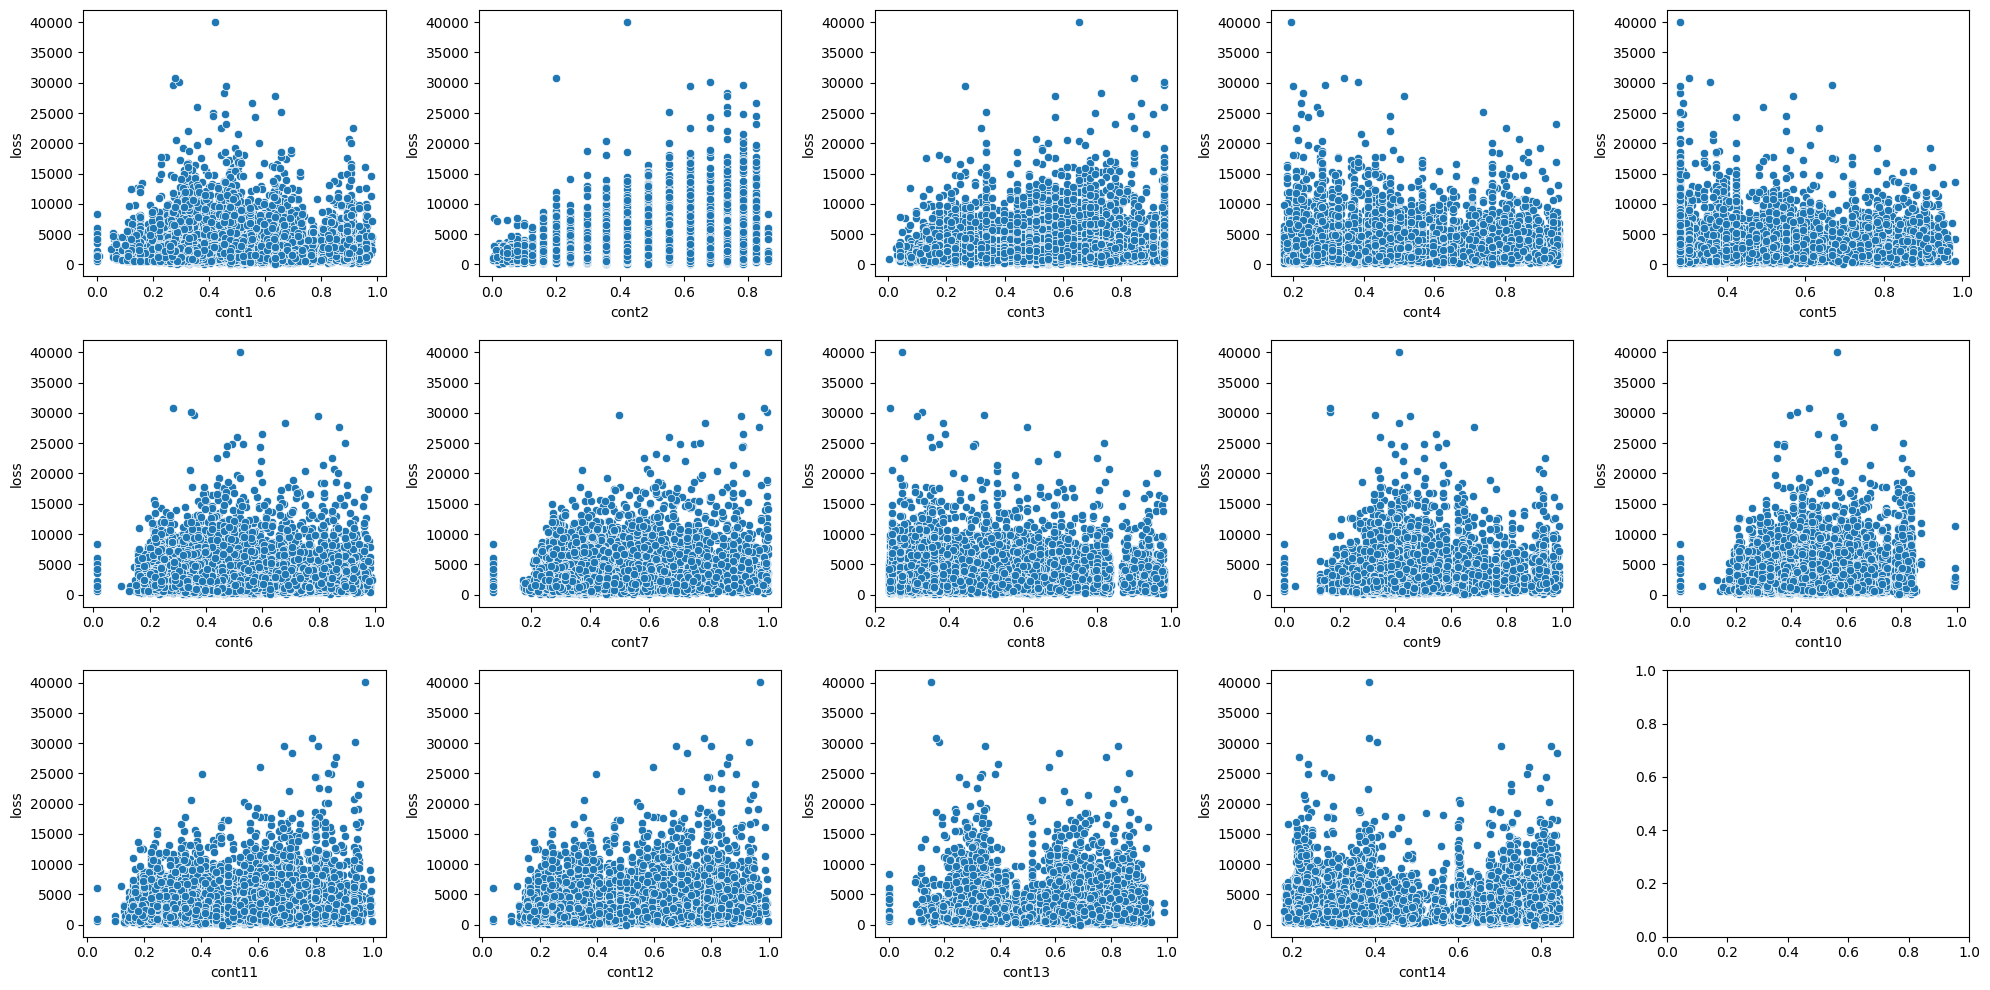

In [191]:
new_list = contFeatureslist.copy()
new_list.remove("loss")
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, col in enumerate(new_list):
    sns.scatterplot(x=col, y='loss', data=train_df, ax=axes[i//5, i%5])
plt.tight_layout()


In [192]:
columns_to_remove = set()

for v,i,j in s_corr_list:
    # Якщо змінні мають дуже сильний лінійний зв'язок між собою, то видалити менш корельовану зі змінними loss
    if i not in columns_to_remove and j not in columns_to_remove:
        if abs(data_corr.iloc[i,-1]) < abs(data_corr.iloc[j,-1]):
            columns_to_remove.add(i)
        else:
            columns_to_remove.add(j)

# Видалити змінні з дуже сильним лінійним зв'язком між собою
train_df = train_df.drop(train_df.columns[list(columns_to_remove)], axis=1)

In [193]:
catFeatureslist = []
for colName,x in train_df.iloc[1,:].iteritems():
    if(str(x).isalpha()):
        catFeatureslist.append(colName)

In [194]:
print(train_df[catFeatureslist].apply(pd.Series.nunique))

cat1        2
cat2        2
cat3        2
cat4        2
cat6        2
         ... 
cat112     51
cat113     51
cat114     14
cat115     19
cat116    213
Length: 109, dtype: int64


In [195]:
from sklearn.preprocessing import LabelEncoder

In [196]:
for cf1 in catFeatureslist:
    le = LabelEncoder()
    le.fit(train_df[cf1].unique())
    train_df[cf1] = le.transform(train_df[cf1])

In [197]:
from scipy.stats import pointbiserialr

high_corr_cats = []
# визначити кореляцію між кожною категоріальною змінною та loss
for cat in catFeatureslist:
    if train_df[cat].dtype == 'object':
        # перетворити категоріальну змінну на числову за допомогою функції factorize
        corr, _ = pointbiserialr(pd.factorize(train_df[cat])[0], train_df['loss'])
    else:
        corr, _ = pointbiserialr(train_df[cat], train_df['loss'])
        
    if abs(corr) > 0.1:  # встановити поріг кореляції 0.1
        high_corr_cats.append(cat)



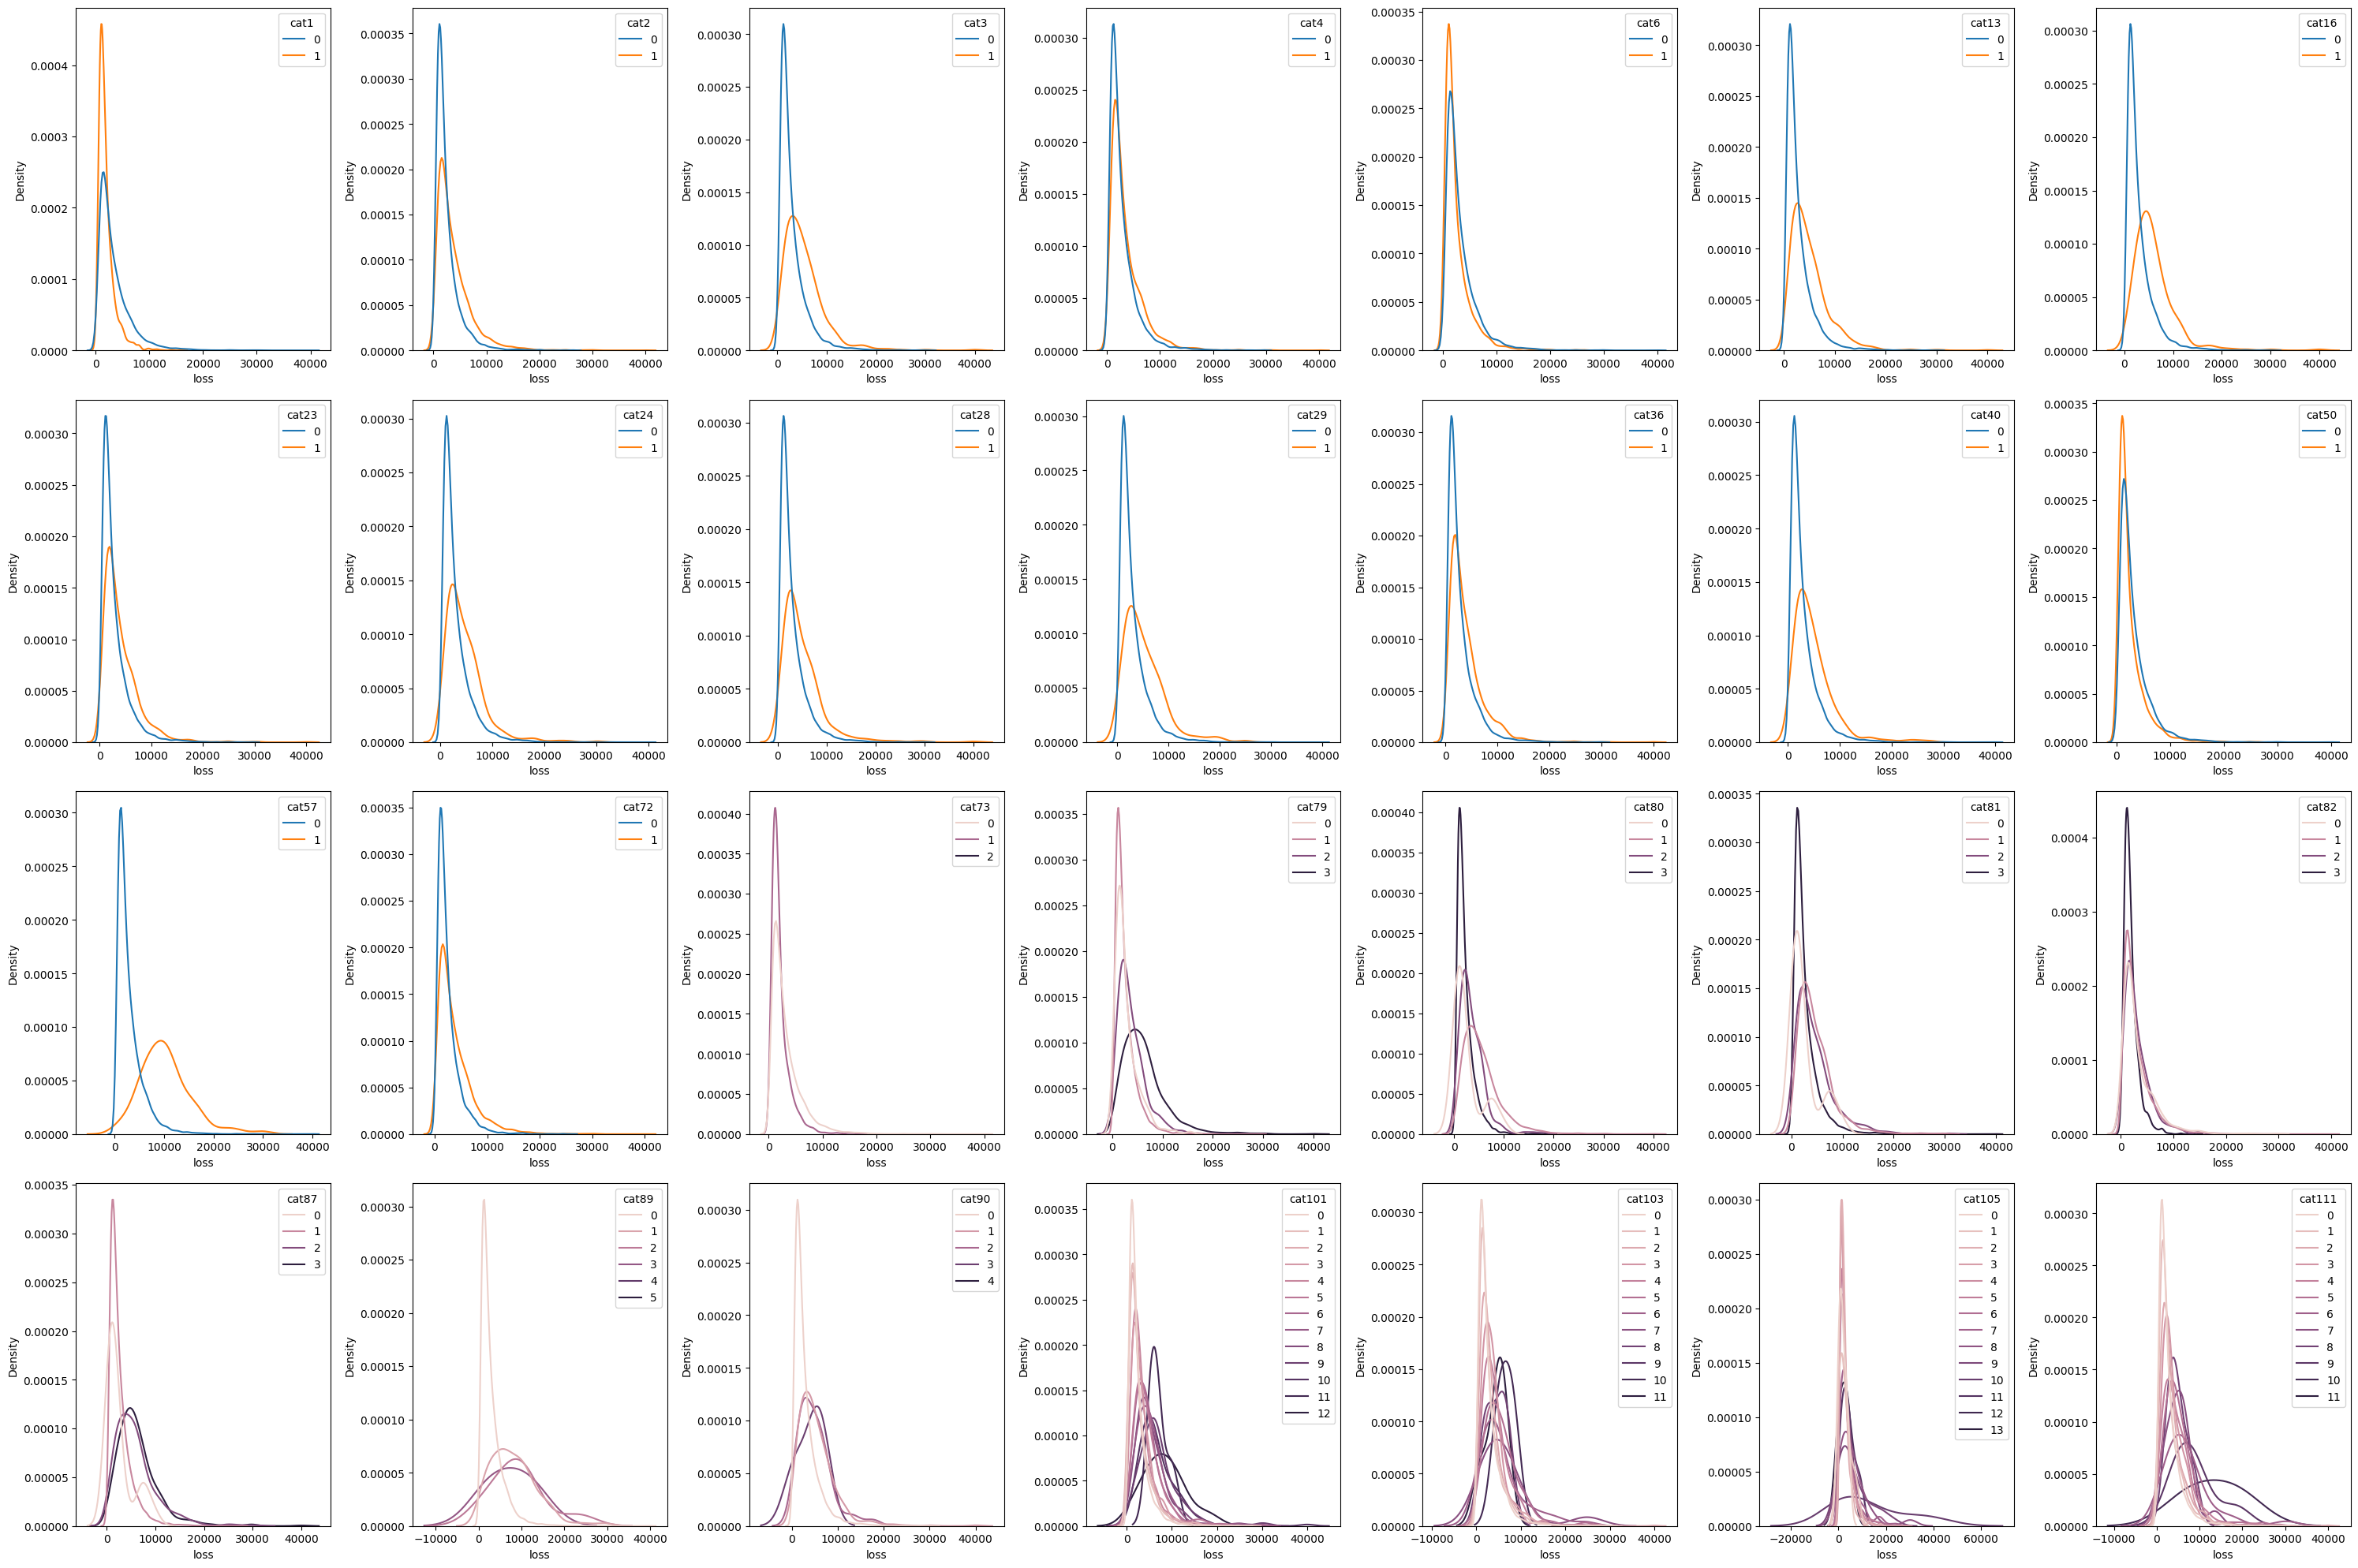

In [198]:
fig, axes = plt.subplots(4, 7, figsize=(30, 20))
for i, col in enumerate(high_corr_cats):
    sns.kdeplot(x='loss', hue=col, data=train_df, ax=axes[i//7, i%7], common_norm=False, warn_singular=False)

plt.tight_layout()

In [199]:
_list = []
for item in catFeatureslist:
    if item not in high_corr_cats:
        _list.append(item)
new_df = train_df.drop(columns= _list)

In [200]:
new_df.head()

cat1  cat2  cat3  cat4  cat6  cat13  cat16  cat23  cat24  cat28  ...  \
0     0     1     0     1     0      0      0      1      0      0  ...   
1     0     1     0     0     0      0      0      0      0      0  ...   
2     0     1     0     0     0      1      0      0      0      0  ...   
3     1     1     0     1     0      0      0      1      0      0  ...   
4     0     1     0     1     0      0      0      1      0      0  ...   

      cont6     cont7    cont8    cont9   cont10    cont11    cont12  \
0  0.718367  0.335060  0.30260  0.67135  0.83510  0.569745  0.594646   
1  0.438917  0.436585  0.60087  0.35127  0.43919  0.338312  0.366307   
2  0.289648  0.315545  0.27320  0.26076  0.32446  0.381398  0.373424   
3  0.440945  0.391128  0.31796  0.32128  0.44467  0.327915  0.321570   
4  0.178193  0.247408  0.24564  0.22089  0.21230  0.204687  0.202213   

     cont13    cont14     loss  
0  0.822493  0.714843  2213.18  
1  0.611431  0.304496  1283.60  
2  0.195709  0.774425  3005.09  
3  0.605077  0.602642   939.85  
4  0.246011  0.432606  2763.85  

[5 rows x 43 columns]

In [201]:
X = new_df.drop(columns=["loss"], axis=1)
y = new_df["loss"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardize the data
def standardize_data(X):
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    X_scaled = (X - X_mean) / X_std
    return X_scaled

X_train_scaled = standardize_data(X_train)
X_test_scaled = standardize_data(X_test)


In [202]:
class _LinearRegression():
    def __init__(self, learning_rate=0.01, n_iterations=1000, epsilon=1e-5):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.epsilon = epsilon
        self.weights = None
        self.bias = None
        self.loss_history = []
    
    def gradient_descent(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        delta = np.ones_like(self.weights)
        iteration = 0
        
        while np.linalg.norm(delta) > self.epsilon and iteration < self.n_iterations:
            y_predicted = np.dot(X, self.weights) + self.bias

            loss = 1/(2*n_samples) * np.sum(np.square(y_predicted - y))
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)

            delta = self.learning_rate * dw
            self.weights -= delta
            self.bias -= self.learning_rate * db
            self.loss_history.append(loss)
            
            iteration += 1
    
    def fit(self, X, y):
        self.gradient_descent(X, y)
    
    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted



In [203]:
def evaluate(*args, verbose=False):
    metrics = [('MSE', mean_squared_error), ('RMSE', lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred))),
               ('MAE', mean_absolute_error), ('R2', r2_score)]

    scores = [(name, metric(*args)) for name, metric in metrics]
    
    if verbose:
        for name, score in scores:
            print(f'{name}: {score:.3f}')
    
    return scores


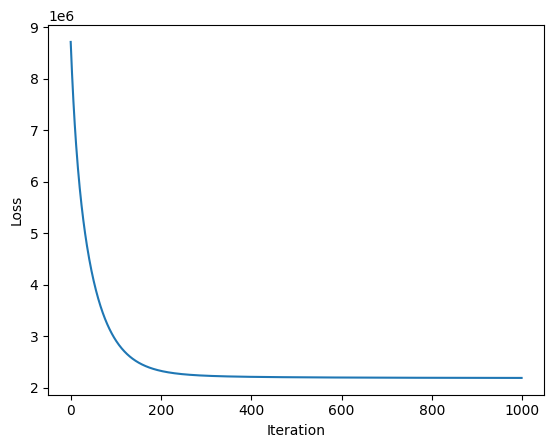

In [204]:
custom_lr = _LinearRegression()
custom_lr.fit(X_train_scaled, y_train)

y_pred = custom_lr.predict(X_train_scaled)
mse, rmse, mae, r2 = evaluate(y_train, y_pred, verbose=False)

plt.plot(custom_lr.loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()


In [205]:
y_train_pred_custom = custom_lr.predict(X_train_scaled)
y_test_pred_custom = custom_lr.predict(X_test_scaled)
results = pd.DataFrame(
[evaluate(y_train, y_train_pred_custom), evaluate(y_test, y_test_pred_custom)],
columns=['MSE', 'RMSE', 'MAE', 'R2'],
index=pd.MultiIndex.from_tuples([('my linear regression', 'Train'), ('my linear regression', 'Test')],
names=['Model', 'Set'])
)
results

MSE  \
Model                Set                               
my linear regression Train  (MSE, 4377479.378592321)   
                     Test   (MSE, 4463978.750303682)   

                                                  RMSE  \
Model                Set                                 
my linear regression Train  (RMSE, 2092.2426672334927)   
                     Test   (RMSE, 2112.8129946362224)   

                                                  MAE  \
Model                Set                                
my linear regression Train  (MAE, 1387.5195276224324)   
                     Test   (MAE, 1380.6632281517943)   

                                                   R2  
Model                Set                               
my linear regression Train   (R2, 0.4647126661265617)  
                     Test   (R2, 0.47333583342413077)

In [206]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

models = {
    'Linear regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso()
}
results = pd.DataFrame(index=pd.MultiIndex.from_product([models.keys(), ['Train', 'Test']], names=['Model', 'Set']), 
                       columns=['MSE', 'RMSE', 'MAE', 'R2'])
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    results.loc[(name, 'Train'), :] = evaluate(y_train, y_train_pred)
    results.loc[(name, 'Test'), :] = evaluate(y_test, y_test_pred)
results

MSE                        RMSE  \
Model             Set                                                           
Linear regression Train  (MSE, 4365850.766455602)   (RMSE, 2089.461836563569)   
                  Test   (MSE, 4447335.591036369)  (RMSE, 2108.8706909235493)   
Ridge             Train  (MSE, 4365852.572009793)   (RMSE, 2089.462268625541)   
                  Test   (MSE, 4447548.030798748)  (RMSE, 2108.9210584558987)   
Lasso             Train  (MSE, 4366498.053670772)  (RMSE, 2089.6167241077424)   
                  Test   (MSE, 4453408.671947988)  (RMSE, 2110.3100890504193)   

                                               MAE                         R2  
Model             Set                                                          
Linear regression Train  (MAE, 1386.2970275147113)  (R2, 0.46613463713977843)  
                  Test   (MAE, 1378.7912087930372)   (R2, 0.4752994080948464)  
Ridge             Train  (MAE, 1386.2721140901638)   (R2, 0.4661344163528357)  
                  Test    (MAE, 1378.819014599374)   (R2, 0.4752743442635292)  
Lasso             Train  (MAE, 1385.7747749665023)  (R2, 0.46605548550531195)  
                  Test   (MAE, 1379.4510447591251)  (R2, 0.47458290063014397)

In [207]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
learning_rates = [0.001, 0.01, 0.1]
n_iterations = [3000, 3000, 5000]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_val_scaled = scaler.fit_transform(X_val)

best_score = float('inf')
best_lr = None
best_n_iter = None

for lr in learning_rates:
    for n_iter in n_iterations:
        model = _LinearRegression(learning_rate=lr, n_iterations=n_iter)
        model.fit(X_train_scaled, y_train)

        # Evaluate the model on the validation set
        y_pred = model.predict(X_val_scaled)
        score = mean_squared_error(y_val, y_pred)

        # Update the best score and hyperparameters if the current score is lower
        if score < best_score:
            best_score = score
            best_lr = lr
            best_n_iter = n_iter

print(f'Best learning rate: {best_lr}')
print(f'Best number of iterations: {best_n_iter}')
print(f'Best score: {best_score:.3f}')



Best learning rate: 0.1
Best number of iterations: 5000
Best score: 4448028.305


In [211]:
# train the model using best parameters
best_custom_lr = _LinearRegression(best_lr, n_iter)
best_custom_lr.fit(X_train_scaled, y_train)

# predict on the train and test set
y_train_pred_custom = best_custom_lr.predict(X_train_scaled)
y_test_pred_custom = best_custom_lr.predict(X_test_scaled)

results.loc[('Best_Custom lr', 'Train'), :] = evaluate(y_train, y_train_pred_custom)
results.loc[('Best_Custom lr', 'Test'), :] = evaluate(y_test, y_test_pred_custom)

results


MSE                        RMSE  \
Model             Set                                                           
Linear regression Train  (MSE, 4365850.766455602)   (RMSE, 2089.461836563569)   
                  Test   (MSE, 4447335.591036369)  (RMSE, 2108.8706909235493)   
Ridge             Train  (MSE, 4365852.572009793)   (RMSE, 2089.462268625541)   
                  Test   (MSE, 4447548.030798748)  (RMSE, 2108.9210584558987)   
Lasso             Train  (MSE, 4366498.053670772)  (RMSE, 2089.6167241077424)   
                  Test   (MSE, 4453408.671947988)  (RMSE, 2110.3100890504193)   
Best_Custom lr    Train  (MSE, 4365871.595569304)  (RMSE, 2089.4668208826156)   
                  Test   (MSE, 4448028.305107849)  (RMSE, 2109.0349226856933)   

                                               MAE                         R2  
Model             Set                                                          
Linear regression Train  (MAE, 1386.2970275147113)  (R2, 0.46613463713977843)  
                  Test   (MAE, 1378.7912087930372)   (R2, 0.4752994080948464)  
Ridge             Train  (MAE, 1386.2721140901638)   (R2, 0.4661344163528357)  
                  Test    (MAE, 1378.819014599374)   (R2, 0.4752743442635292)  
Lasso             Train  (MAE, 1385.7747749665023)  (R2, 0.46605548550531195)  
                  Test   (MAE, 1379.4510447591251)  (R2, 0.47458290063014397)  
Best_Custom lr    Train  (MAE, 1386.2547190995388)  (R2, 0.46613209011219103)  
                  Test   (MAE, 1378.9568127627886)   (R2, 0.4752176810751766)

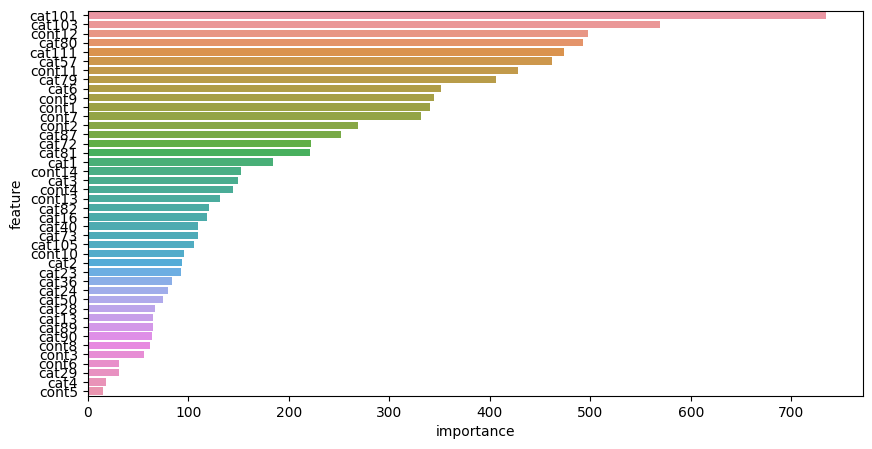

In [212]:
# plot feature importance
feature_importance = pd.DataFrame(
    {'feature': X.columns, 'importance': np.abs(best_custom_lr.weights)}
).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.show()

In [215]:
X = new_df.drop(['loss', 'cont5', 'cat4'], axis=1)
y = new_df['loss']

X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler2 = StandardScaler()
X_train_reduced_scaled = scaler2.fit_transform(X_train_reduced)
X_test_reduced_scaled = scaler2.transform(X_test_reduced)

custom_lr_reduced = _LinearRegression(best_lr, n_iter)
custom_lr_reduced.fit(X_train_reduced_scaled, y_train)

y_train_pred_custom = custom_lr_reduced.predict(X_train_reduced_scaled)
y_test_pred_custom = custom_lr_reduced.predict(X_test_reduced_scaled)

results.loc[('Custom lr reduced', 'Train'), :] = evaluate(y_train, y_train_pred_custom)
results.loc[('Custom lr reduced', 'Test'), :] = evaluate(y_test, y_test_pred_custom)

results

MSE                        RMSE  \
Model             Set                                                           
Linear regression Train  (MSE, 4365850.766455602)   (RMSE, 2089.461836563569)   
                  Test   (MSE, 4447335.591036369)  (RMSE, 2108.8706909235493)   
Ridge             Train  (MSE, 4365852.572009793)   (RMSE, 2089.462268625541)   
                  Test   (MSE, 4447548.030798748)  (RMSE, 2108.9210584558987)   
Lasso             Train  (MSE, 4366498.053670772)  (RMSE, 2089.6167241077424)   
                  Test   (MSE, 4453408.671947988)  (RMSE, 2110.3100890504193)   
Best_Custom lr    Train  (MSE, 4365871.595569304)  (RMSE, 2089.4668208826156)   
                  Test   (MSE, 4448028.305107849)  (RMSE, 2109.0349226856933)   
Custom lr reduced Train  (MSE, 4366170.956733084)  (RMSE, 2089.5384554329416)   
                  Test   (MSE, 4443594.808516566)   (RMSE, 2107.983588293933)   

                                               MAE                         R2  
Model             Set                                                          
Linear regression Train  (MAE, 1386.2970275147113)  (R2, 0.46613463713977843)  
                  Test   (MAE, 1378.7912087930372)   (R2, 0.4752994080948464)  
Ridge             Train  (MAE, 1386.2721140901638)   (R2, 0.4661344163528357)  
                  Test    (MAE, 1378.819014599374)   (R2, 0.4752743442635292)  
Lasso             Train  (MAE, 1385.7747749665023)  (R2, 0.46605548550531195)  
                  Test   (MAE, 1379.4510447591251)  (R2, 0.47458290063014397)  
Best_Custom lr    Train  (MAE, 1386.2547190995388)  (R2, 0.46613209011219103)  
                  Test   (MAE, 1378.9568127627886)   (R2, 0.4752176810751766)  
Custom lr reduced Train  (MAE, 1386.1599572432394)   (R2, 0.4660954836029727)  
                  Test   (MAE, 1388.4092336101048)  (R2, 0.47574074892963414)